In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,uniform

In [2]:
# 目标采样分布的概率密度函数(已知形式但是很复杂)
def p(x):
    return ((0.3 * np.exp(-(x-0.3)**2))+0.7*np.exp(-(x-2.)**2/0.3))/1.2113

我们可以画出分布的pdf函数

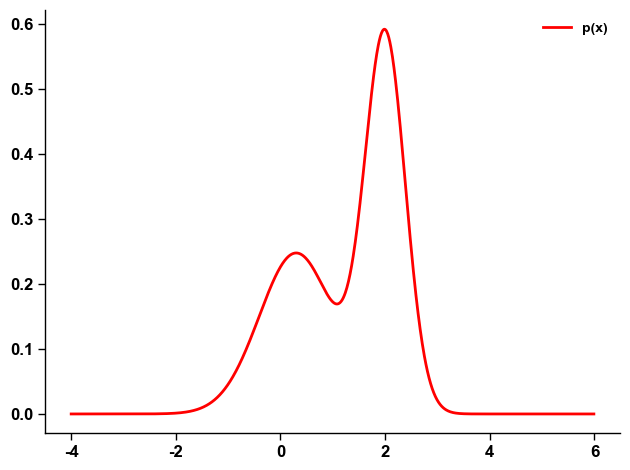

In [3]:
x = np.arange(-4., 6., 0.01)
plt.plot(x, p(x), color='r', label='p(x)')
plt.legend()

Text(0, 0.5, 'pdf')

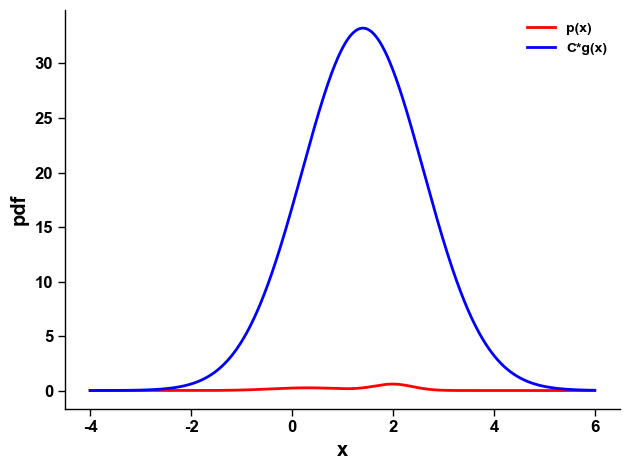

In [9]:
# 设定C值
C = 100

# g(x)为均值=1.4, 标准差=1.2的高斯分布

# 画出两个分布
x = np.arange(-4., 6., 0.01)
plt.plot(x, p(x), color='r', label='p(x)')
plt.plot(x, C*norm.pdf(x, loc=1.4, scale=1.2), color='b', label='C*g(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('pdf')

In [5]:
from numpy import random
# 现在我们来采样
sample = []

nSample = 10000
for i in range(nSample):
    #========== please fill in your code ===========
    # 先从g(x)分布采样
    ss = norm.rvs(loc=1.4, scale=1.2)
    # 再从(0,1)均匀分布采样
    u = random.uniform(0, 1) # 从[0,1]分布采样
    # 
    if u <= p(ss)/(C*norm.pdf(ss,loc=1.4, scale=1.2)):
        sample.append(ss)

Text(0, 0.5, 'p(x)')

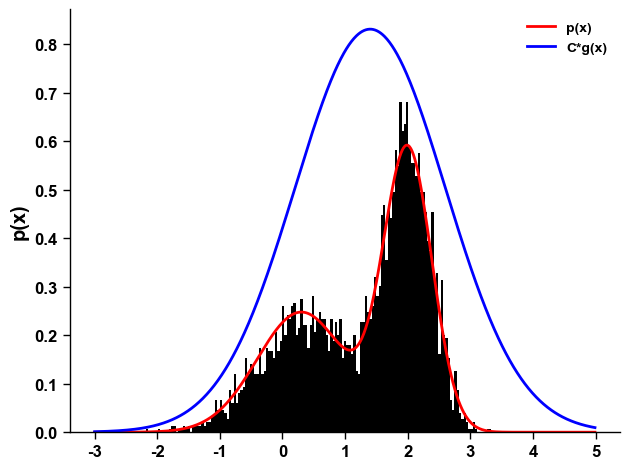

In [6]:
# 完成之后, 我们画出分布
x = np.arange(-3., 5., 0.01)
plt.plot(x, p(x), color='r', label='p(x)')
plt.plot(x, C*norm.pdf(x, loc=1.4, scale=1.2), color='b', label='C*g(x)')
plt.hist(sample, color='k', bins=150, density=True)
plt.legend()
plt.ylabel('p(x)')

In [10]:
# 可以写成矩阵形式
nSample = 10000
uniform_rv = uniform(loc=0, scale=1)
norm_rv = norm(loc=1.4, scale=1.2)
yy = norm_rv.rvs(size=nSample)
uu = uniform_rv.rvs(size=nSample)
mask = (uu <= p(yy)/(C*norm_rv.pdf(yy)))
sample = yy[mask] 

Text(0, 0.5, 'p(x)')

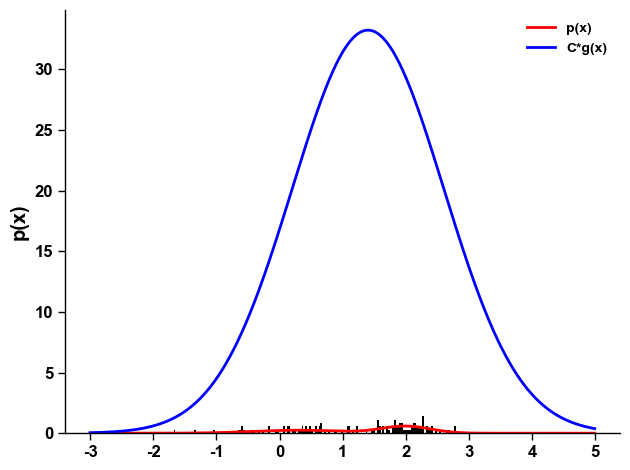

In [11]:
# 完成之后, 我们画出分布
x = np.arange(-3., 5., 0.01)
plt.plot(x, p(x), color='r', label='p(x)')
plt.plot(x, C*norm_rv.pdf(x), color='b', label='C*g(x)')
plt.hist(sample, color='k', bins=150, density=True)
plt.legend()
plt.ylabel('p(x)')

以上的算法要求你必须找到一个常数c，使得$c*g(x)>=f(x)$, 如果这个c不太好找怎么办？下面介绍Metropolis算法

